# HATE SPEECH IDENTIFICATION

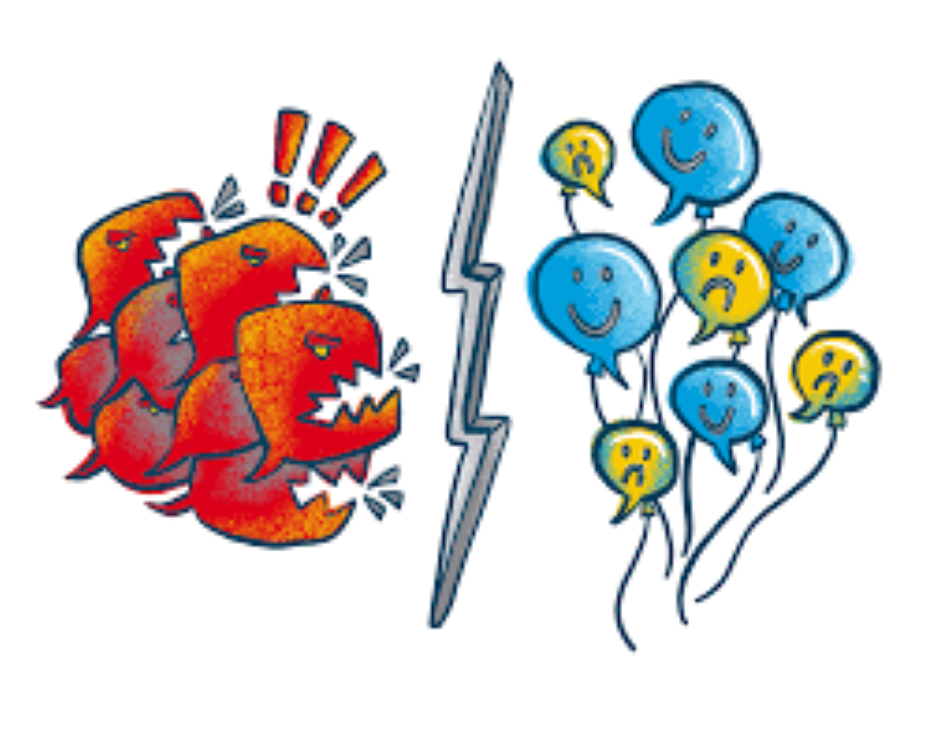

### Import required Libraries

In [1]:

import sklearn
import seaborn as sns
# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Text Vectorization and Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    f1_score, precision_score, recall_score,
    roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight

# Data Manipulation and Visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
import pickle
from collections import Counter

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize


In [2]:

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alpha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alpha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\alpha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alpha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## About the data:

Dataset using Twitter data, is was used to research hate-speech identification. The text is classified as: hate-speech, offensive language, and neither. Due to the nature of the study, it’s important to note that this dataset contains text that can be considered racist, sexist, homophobic, or generally offensive.

The link to the dataset can be found at : https://data.world/crowdflower/hate-speech-identification

### Definitions of terms:

1. CF- CrowdFlower

2. Tweet - text tweet

### OFFENSIVE LANGUAGE IDENTIFIER

The data are stored as a CSV with each data file containing 5 columns:

1. count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

2. hate_speech = number of CF users who judged the tweet to be hate speech.

3. offensive_language = number of CF users who judged the tweet to be offensive.

4. neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.

5. class = class label for majority of CF users in three categories namely:

            a) 0 - hate speech 

            b) 1 - offensive language 
            
            c) 2 - neither


## Problem Statement: 

Identifying and detecting hate speech represents a pressing and pivotal challenge within the realm of natural language processing (NLP) systems. Hate speech encompasses the deployment of offensive language, discriminatory comments, and expressions of prejudice directed at individuals or groups on the basis of attributes such as race, religion, ethnicity, gender, or other protected characteristics. The existing NLP algorithms grapple with significant challenges in precisely discerning hate speech, thereby jeopardizing the integrity of online communication platforms and compromising user safety. 

Establishing effective mechanisms for hate speech detection is crucial not only for maintaining the security of online spaces but also for fostering an environment that promotes peace and inclusivity. The multifaceted targets of this effort include ensuring a discrimination-free online discourse, mitigating potential harm caused by hate speech, and cultivating an atmosphere conducive to constructive and respectful dialogue.

The ability to identify and detect hate speech is crucial for creating a safer online environment and fostering positive digital interactions. It involves collaboration among social media platforms, users, governments, NGOs, law enforcement, educational institutions, and technology developers.


## Stakeholders
The ability to identify and detect hate speech in online communication platforms is crucial for various stakeholders who play distinct roles in the digital landscape. The primary stakeholders requiring this capability include:

1. Online Platforms:

    a) Social Media Companies

    b) Content Hosting Websites

    c) Discussion Forums and Communities
    
These platforms are responsible for ensuring a safe and inclusive environment for their users. Detecting hate speech helps them uphold community guidelines, prevent the spread of harmful content, and maintain a positive user experience.

2. Users and General Public:

Individuals Engaging in Online Communication
Users benefit from platforms that actively identify and curb hate speech. It contributes to their safety, reduces the risk of online harassment, and fosters a more respectful and tolerant online community.

3. Governments and Regulatory Bodies:

    a) Government Agencies

    b) Regulatory Authorities

Governments and regulatory bodies are concerned with safeguarding the well-being of citizens and maintaining societal harmony. They may enforce policies and regulations related to hate speech detection to combat online hate crimes and protect vulnerable groups.

4. Non-Governmental Organizations (NGOs):

    a) Civil Rights Organizations

    b) Anti-Hate Groups

NGOs focused on civil rights and combating hate speech can leverage this capability to monitor and address instances of online hate, contributing to their advocacy efforts and promoting a more inclusive digital space.

5. Law Enforcement Agencies:

    a) Police Departments

    b) Cybercrime Units

Law enforcement may utilize hate speech detection to investigate and address cases where online communication escalates into criminal activity, ensuring the legal consequences for those who engage in hate crimes.

6. Educational Institutions:

Schools and Universities

Educational institutions can benefit from hate speech detection to maintain a respectful online learning environment, prevent bullying, and educate students on digital citizenship.

7. Technology Companies and Developers:

    a) NLP Algorithm Developers

    b) AI and Machine Learning Experts
    
Those involved in developing and advancing NLP algorithms play a pivotal role. Improving hate speech detection algorithms contributes to the responsible development of AI technologies and aligns with ethical considerations.

In [3]:
# Load dataset
df = pd.read_csv(r"./labeled_data.csv")
df

,column_a,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
df["class"].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

# Plot showing distribution of class feature
df["class"].map({0: "Hate Speech", 1 : "Offensive Speech", 2: "neither"}).value_counts().plot(kind= "bar");
plt.title("Tweet Category Vs Frequency");
plt.xlabel("Category");
plt.ylabel("Frequency");
plt.show()

In [5]:
# Get the value counts for each label column
Hate_speech_1_counts = df['hate_speech'].value_counts()
offensive_language_2_counts = df['offensive_language'].value_counts()
neither_3_counts = df['neither'].value_counts()

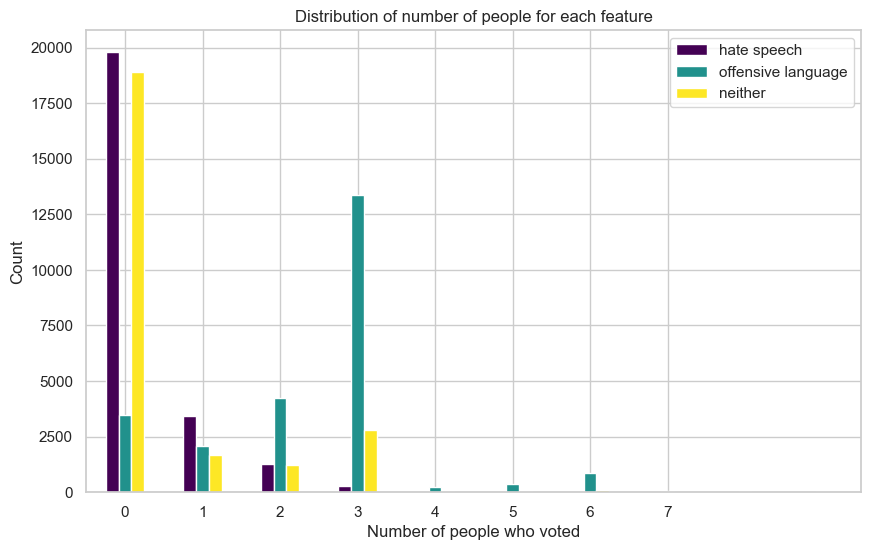

In [6]:
# Combine the counts into a single DataFrame
ratings_counts_df = pd.DataFrame({
    'hate speech': Hate_speech_1_counts,
    'offensive language': offensive_language_2_counts,
    'neither': neither_3_counts
}).fillna(0)

# Visualize the counts using a bar graph
sns.set(style="whitegrid")
ax = ratings_counts_df.plot(kind='bar', rot=0, figsize=(10, 6), colormap='viridis')

# Set x-axis ticks 
ax.set_xticks(range(8))

# Set plot labels and title
plt.xlabel('Number of people who voted')
plt.ylabel('Count')
plt.title('Distribution of number of people for each feature')
plt.show()

In [7]:
# Transform class into binary

df["class"] = df["class"].astype(int)
df["class"] = df["class"].apply(lambda x : 0 if x==2 else 1)

## Out of all the tweets, in which category is a tweet classified?

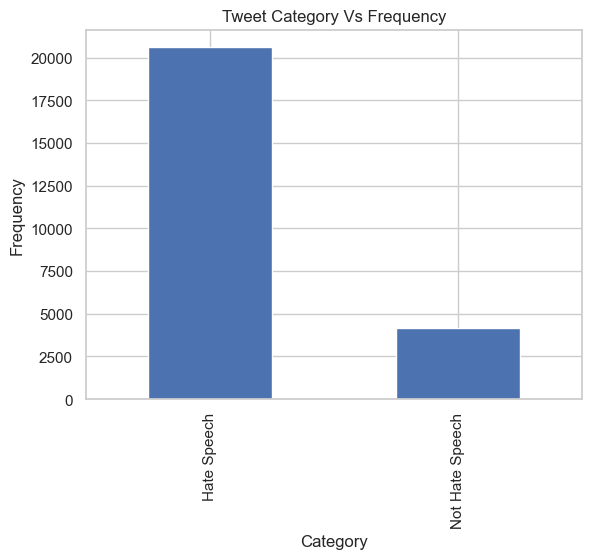

In [8]:
df["class"].map({0: "Not Hate Speech", 1 : "Hate Speech"}).value_counts().plot(kind = "bar");
plt.title("Tweet Category Vs Frequency");
plt.xlabel("Category");
plt.ylabel("Frequency");
plt.show()

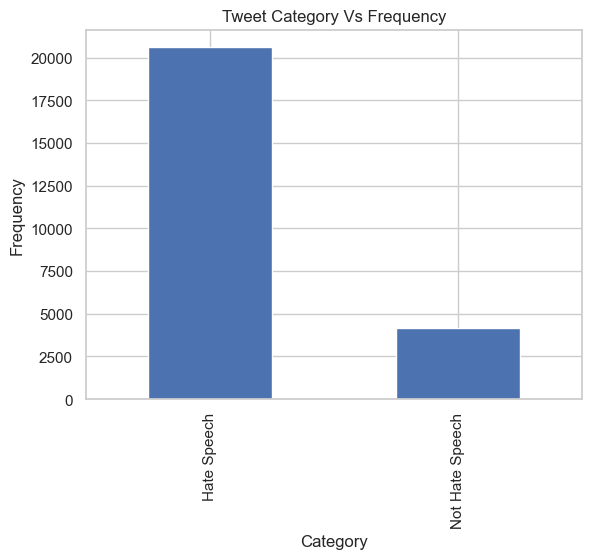

In [9]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
if 'class' in df.columns and not df['class'].empty:
    df["class"].map({0: "Not Hate Speech", 1: "Hate Speech"}).value_counts().plot(kind="bar")
    plt.title("Tweet Category Vs Frequency")
    plt.xlabel("Category")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("'class' column is empty or does not exist.")

A clear class imbalance can be seen.

In [10]:
df["class"].value_counts()

class
1    20620
0     4163
Name: count, dtype: int64

In [11]:
def clean_the_text(text):
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    # Removing special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    # Removing words with repeated characters
    text = re.sub(r'\b(\w)\1+\b', '', text)
    
    # Tokenizing text
    tokens = text.lower().split()
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)


In [12]:
df

,column_a,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,0,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [13]:
# Confusion matrices after lemmatization
def plot_confusion_matrices(cm_train, cm_test, title_train, title_test):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    for ax, cm, title in zip(axes, [cm_train, cm_test], [title_train, title_test]):
        cax = ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(title)

    plt.colorbar(cax, ax=axes.ravel().tolist(), shrink=0.5)
    plt.show()

def plot_precision_recall_curves_subplots(y_train, y_scores_train, y_test, y_scores_test, n_classes, title_train, title_test):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    # Function to compute and plot precision-recall curve for each subplot
    def compute_and_plot_pr_curve(ax, y_true, y_scores, n_classes, title):
        precision = dict()
        recall = dict()
        average_precision = dict()
        for i in range(n_classes):
            precision[i], recall[i], _ = precision_recall_curve(y_true == i, y_scores[:, i])
            average_precision[i] = average_precision_score(y_true == i, y_scores[:, i])
        colors = ['blue', 'red', 'green', 'purple', 'orange']
        for i, color in zip(range(n_classes), colors):
            ax.plot(recall[i], precision[i], color=color, lw=2,
                    label='PR curve of class {0} (area = {1:0.2f})'.format(i, average_precision[i]))

        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.0])
        ax.set_title(title)
        ax.legend(loc="lower left")
        

    # Plot for training data
    compute_and_plot_pr_curve(axes[0], y_train, y_scores_train, n_classes, title_train)
    
    # Plot for testing data
    compute_and_plot_pr_curve(axes[1], y_test, y_scores_test, n_classes, title_test)

    plt.show()
    

In [14]:
# Creating function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, n_classes=2):
    # Fitting the model on the training data
    model.fit(X_train, y_train)

    # Predicting on the training and test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    plot_confusion_matrices(confusion_matrix(y_train, y_pred_train), confusion_matrix(y_test, y_pred_test), 'Confusion Matrix for Training Data', 'Confusion Matrix for Testing Data')

    # Calculating metrics for training data
    metrics_train = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train),
        'Recall': recall_score(y_train, y_pred_train),
        'F1 Score': f1_score(y_train, y_pred_train),
        'ROC AUC Score': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    }

    # Calculating metrics for testing data
    metrics_test = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        'ROC AUC Score': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

    # Printing out the metrics for training and testing data
    print("Training Data Metrics:\n")
    for metric, value in metrics_train.items():
        print(f"{metric}: {value}")

    print("\nTesting Data Metrics:\n")
    for metric, value in metrics_test.items():
        print(f"{metric}: {value}")
        
    plot_precision_recall_curves_subplots(
        y_train, model.predict_proba(X_train), 
        y_test, model.predict_proba(X_test), 
        n_classes=n_classes, 
        title_train='Precision-Recall Curve (Train)', 
        title_test='Precision-Recall Curve (Test)'
    )
    
    plot_roc_curves_subplots(
        y_train, model.predict_proba(X_train), 
        y_test, model.predict_proba(X_test), 
        n_classes=n_classes, 
        title_train='ROC for Binary Classification (Train)', 
        title_test='ROC for Binary Classification (Test)'
    )
    
    return model, metrics_train, metrics_test

def combine_train_test_metrics(model_name, metrics_train, metrics_test):
    # Creating a DataFrame for each set of metrics
    df_train = pd.DataFrame({f'{model_name} Train': metrics_train})
    df_test = pd.DataFrame({f'{model_name} Test': metrics_test})

    # Concatenating the training and testing metrics side by side
    return pd.concat([df_train, df_test], axis=1)


In [15]:
# Fuction to plot the curves 
def plot_roc_curves_subplots(y_train, y_score_train, y_test, y_score_test, n_classes, title_train, title_test):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Function to compute and plot ROC curve and AUC for each subplot
    def compute_and_plot_roc(ax, y_true, y_score, n_classes, title):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true == i, y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        colors = ['blue', 'red', 'green', 'purple', 'orange']
        for i, color in zip(range(n_classes), colors):
            ax.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

        ax.plot([0, 1], [0, 1], 'k--', lw=2)
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(title)
        ax.legend(loc="lower right")

    # Plot for training data
    compute_and_plot_roc(axes[0], y_train, y_score_train, n_classes, title_train)
    
    # Plot for testing data
    compute_and_plot_roc(axes[1], y_test, y_score_test, n_classes, title_test)

    plt.show()

In [16]:
# Cleaning the tweet column
df['cleaned_tweet'] = df['tweet'].apply(clean_the_text)


# Word cloud 

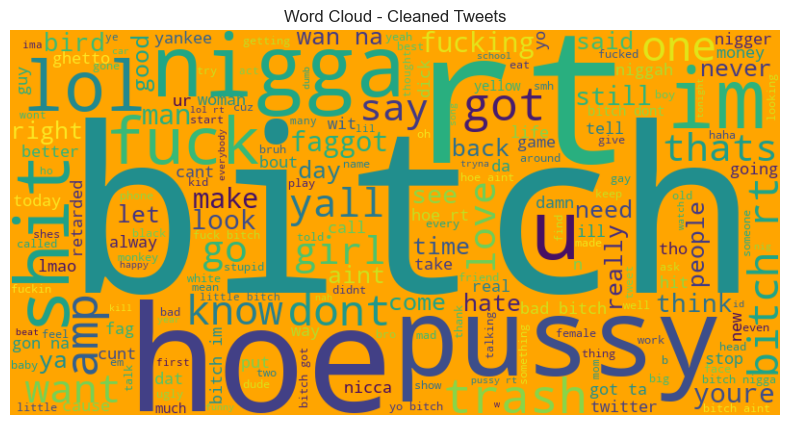

In [17]:
# Concatenate all cleaned tweets into a single string
text_data = ' '.join(df['cleaned_tweet'].astype(str))

# Tokenize the text
tokens = word_tokenize(text_data)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Join the filtered tokens into a string
processed_text = ' '.join(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='orange').generate(processed_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Cleaned Tweets')
plt.show()

In [ ]:
def generate_word_cloud(text_data, title):
    # Flatten the list of lists into a single list of strings
    flattened_text = ' '.join(text_data)

    # Check if the flattened_text is not empty
    if flattened_text:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(flattened_text)
        plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"No data available for {title}.")

# Concatenate all cleaned tweets into a single string for both classes
text_not_hate_speech = ' '.join(df[df['class'] == 0]['cleaned_tweet'].astype(str))
text_hate_speech = ' '.join(df[df['class'] == 1]['cleaned_tweet'].astype(str))

# Tokenize the text for both classes
tokens_not_hate_speech = word_tokenize(text_not_hate_speech)
tokens_hate_speech = word_tokenize(text_hate_speech)

# Remove stopwords for both classes
stop_words = set(stopwords.words('english'))
filtered_tokens_not_hate_speech = [word for word in tokens_not_hate_speech if word.lower() not in stop_words]
filtered_tokens_hate_speech = [word for word in tokens_hate_speech if word.lower() not in stop_words]

# Generate combined word cloud for both classes
combined_text_data = filtered_tokens_not_hate_speech + filtered_tokens_hate_speech
generate_word_cloud(combined_text_data, 'Combined Word Cloud for Not Hate Speech and Hate Speech Class')

##  Splitting The Data into X and Y

In [ ]:
# Splitting the dataset into features and target
X = df.drop(['class', 'tweet', 'offensive_language', 'neither'], axis=1)  # Features
y = df['class']  # Target

# Performing a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the 'cleaned_tweet' from the remaining features
X_train_tweets = X_train['cleaned_tweet']
X_train_remaining = X_train.drop('cleaned_tweet', axis=1)

X_test_tweets = X_test['cleaned_tweet']
X_test_remaining = X_test.drop('cleaned_tweet', axis=1)

## Creating numeric features from textual representation

In [ ]:
# Creating a TF-IDF vectorizer
tfidf_vectorizer = CountVectorizer(min_df=0.005)

# Fitting the TF-IDF vectorizer on the training 'cleaned_tweet' data and transforming it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_tweets)

# Only transforming the 'cleaned_tweet' test data into TF-IDF vectors to avoid data leakage
X_test_tfidf = tfidf_vectorizer.transform(X_test_tweets)

# Converting the TF-IDF vectors into a DataFrame
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=X_train_remaining.index)
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=X_test_remaining.index)

X_train_tfidf_df.shape, X_test_tfidf_df.shape

((19826, 216), (4957, 216))

In [ ]:
# Merging the TF-IDF features with the remaining features
X_train_final = X_train_tfidf_df
X_test_final = X_test_tfidf_df

In [ ]:
X_train_final.shape

(19826, 216)

In [ ]:
X_train_final.corr()

,act,aint,already,always,amp,another,around,as,baby,back,...,would,ya,yall,yankee,yeah,year,yellow,yes,yo,youre
act,1.000000,0.008834,0.004133,-0.001054,0.001226,-0.005515,-0.006263,0.006109,0.009950,0.000265,...,0.002185,0.004238,0.008613,-0.002656,-0.006519,-0.006512,-0.007295,-0.005042,-0.010716,-0.010516
aint,0.008834,1.000000,-0.005948,0.001292,-0.003722,0.012495,-0.000482,0.013456,0.008850,0.002688,...,-0.020021,0.028701,0.026960,-0.023322,-0.002472,-0.012302,-0.019171,-0.011788,0.039339,-0.015717
already,0.004133,-0.005948,1.000000,-0.007414,0.011770,-0.005512,0.001643,0.001290,0.010248,-0.004559,...,0.013481,0.013506,0.012883,0.013778,0.000834,0.007354,0.005760,0.004024,-0.006643,0.006398
always,-0.001054,0.001292,-0.007414,1.000000,-0.008151,0.003153,0.018044,0.013232,-0.008331,-0.010291,...,-0.012462,0.002465,0.000901,-0.007736,-0.009337,-0.004588,0.016319,-0.001026,-0.007007,0.002278
amp,0.001226,-0.003722,0.011770,-0.008151,1.000000,0.007427,0.002346,0.004220,0.018196,0.004559,...,0.001493,0.003094,0.024482,-0.009060,-0.004774,-0.005362,0.020513,0.007748,0.004091,-0.004979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
year,-0.006512,-0.012302,0.007354,-0.004588,-0.005362,0.010790,0.021006,0.009224,-0.007313,0.024601,...,-0.006887,-0.004774,0.003855,0.045643,0.002547,1.000000,0.019445,-0.006340,-0.004555,-0.007043
yellow,-0.007295,-0.019171,0.005760,0.016319,0.020513,0.003356,-0.003384,-0.013278,-0.008193,0.000308,...,-0.000810,-0.006527,-0.014870,-0.011267,0.005990,0.019445,1.000000,-0.007103,-0.012295,-0.008995
yes,-0.005042,-0.011788,0.004024,-0.001026,0.007748,-0.005370,0.001455,-0.009143,-0.005663,-0.009325,...,-0.008471,-0.004491,-0.010279,-0.007789,0.000677,-0.006340,-0.007103,1.000000,0.001229,0.001882
yo,-0.010716,0.039339,-0.006643,-0.007007,0.004091,0.012856,0.000599,0.114646,-0.005146,0.010285,...,-0.001357,0.006434,-0.008443,-0.016551,0.014881,-0.004555,-0.012295,0.001229,1.000000,-0.014507


In [ ]:
X_train_final.shape

(19826, 216)

In [ ]:
# Computing class weights as the dataset is imbalanced
class_weights = compute_class_weight('balanced', classes=[0, 1], y=df["class"])
class_weights = dict(enumerate(class_weights))

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Get the unique classes in your target variable
unique_classes = df["class"].unique()

# Computing class weights as the dataset is imbalanced
class_weights = compute_class_weight('balanced', classes=unique_classes, y=df["class"])
class_weights = dict(enumerate(class_weights))

In [ ]:
unique_classes

array([0, 1], dtype=int64)

In [ ]:
class_weights

{0: 2.9765793898630797, 1: 0.6009456838021339}

## Modelling

### Logistic Regression

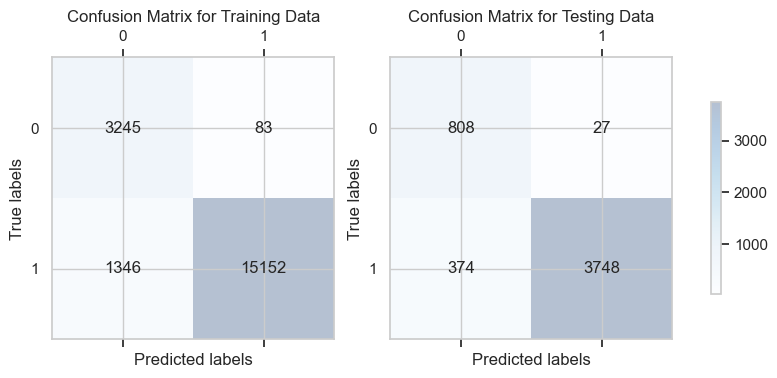

Training Data Metrics:

Accuracy: 0.9279229294865329
Precision: 0.9945520183787332
Recall: 0.91841435325494
F1 Score: 0.954968014369899
ROC AUC Score: 0.9787120448603328

Testing Data Metrics:

Accuracy: 0.9191042969538027
Precision: 0.9928476821192053
Recall: 0.9092673459485686
F1 Score: 0.9492212232493352
ROC AUC Score: 0.9700774578935288


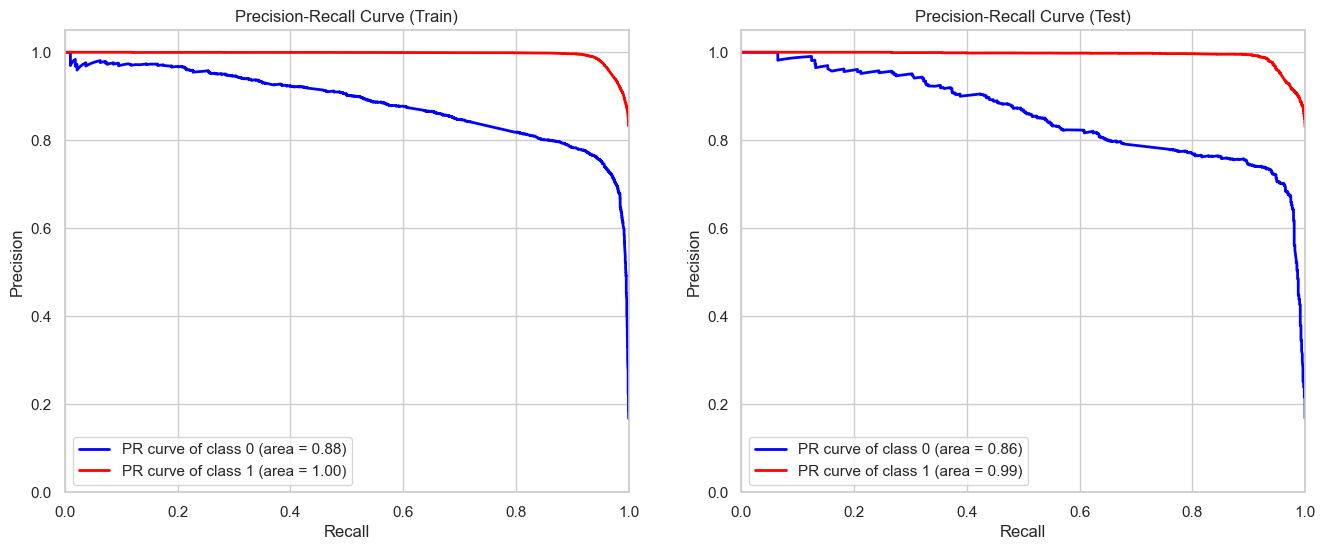

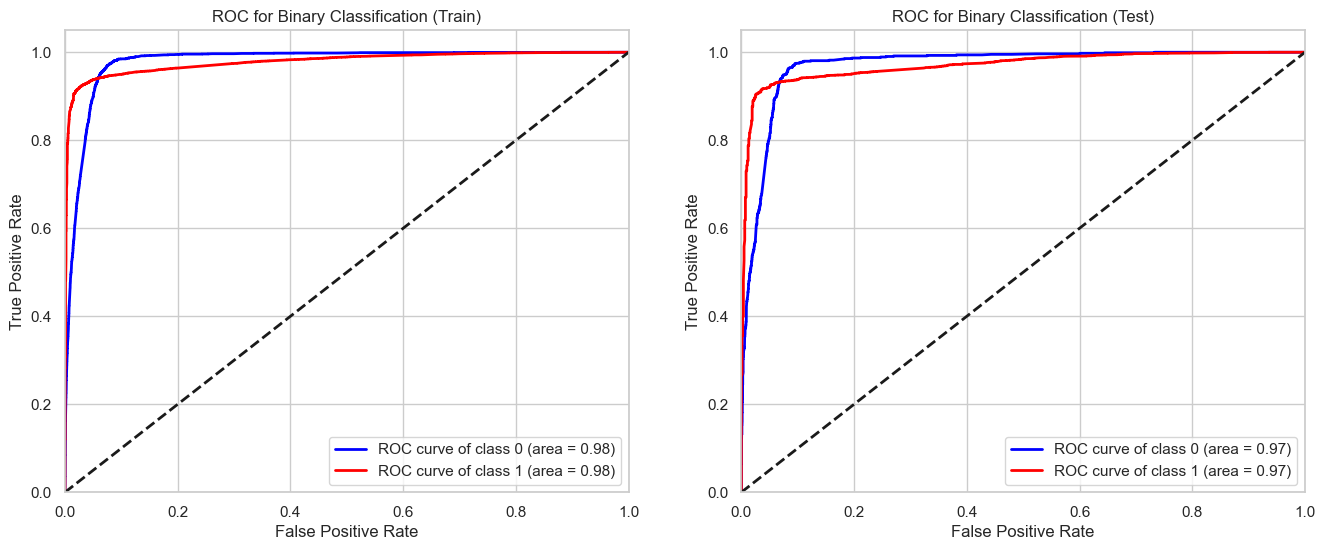

In [ ]:
# Initializing logistic regression model
log_reg = LogisticRegression(class_weight = class_weights, random_state=42)

log_reg, lr_metrics_train, lr_metrics_test = evaluate_model(log_reg, X_train_final, y_train, X_test_final, y_test)

## Decision Tree

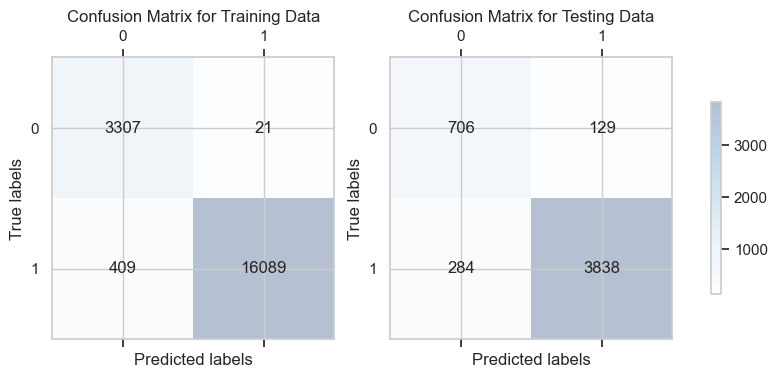

Training Data Metrics:

Accuracy: 0.9783113083829315
Precision: 0.9986964618249534
Recall: 0.975209116256516
F1 Score: 0.9868130520117762
ROC AUC Score: 0.9979914068109654

Testing Data Metrics:

Accuracy: 0.9166834779100262
Precision: 0.967481724224855
Recall: 0.9311014070839398
F1 Score: 0.9489430090246013
ROC AUC Score: 0.8911051259925564


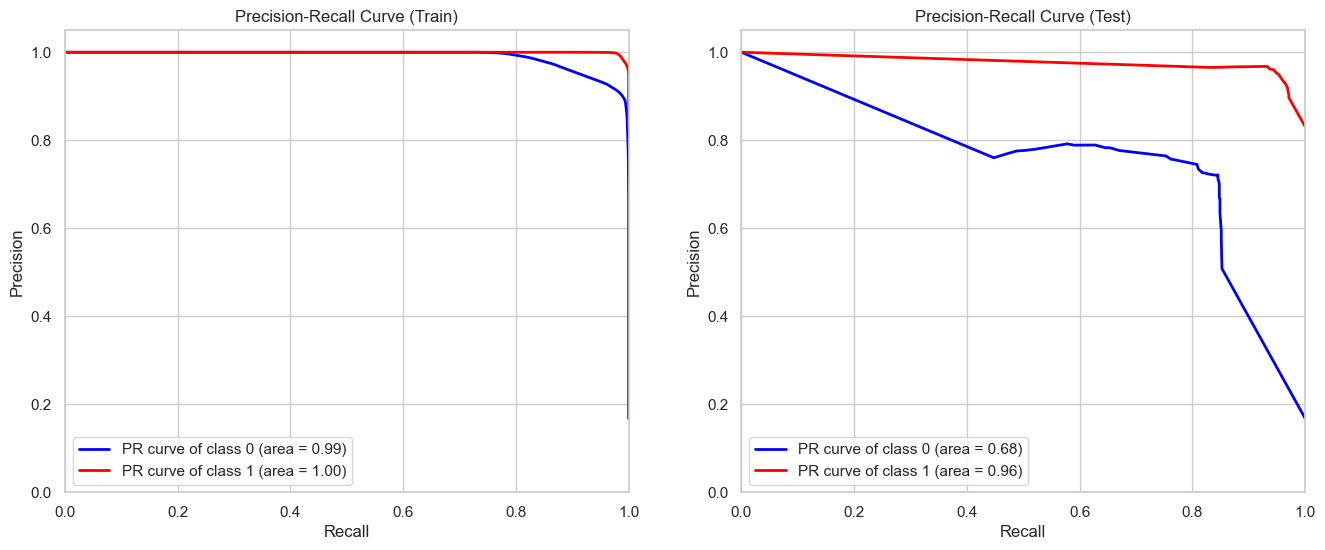

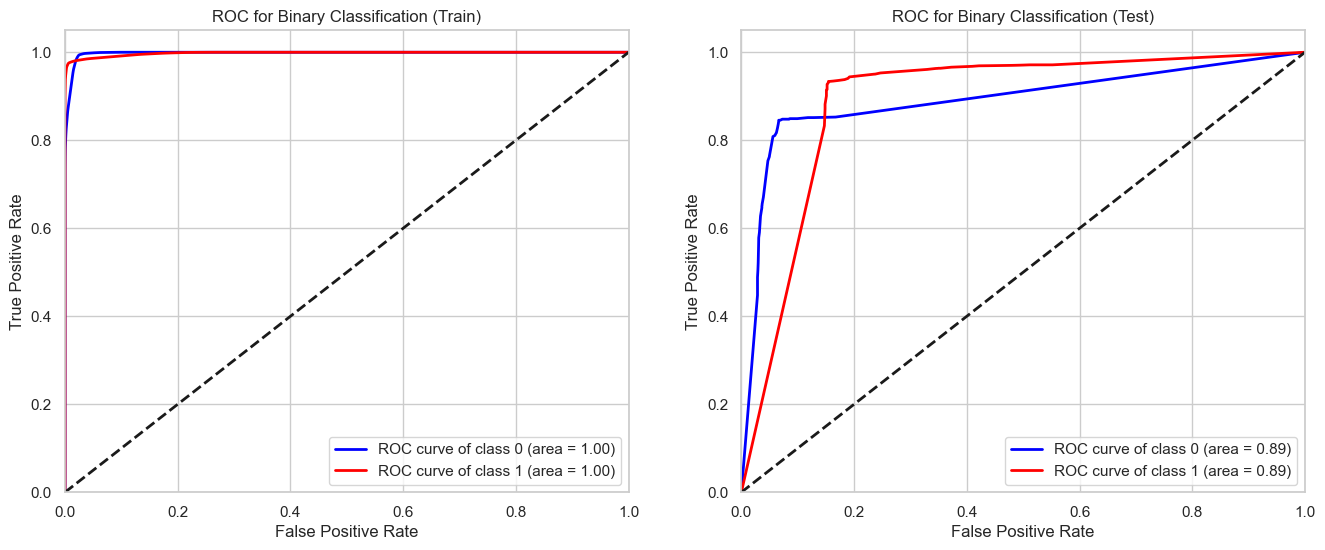

In [ ]:
# Initializing Decision Tree model
dtree = DecisionTreeClassifier(class_weight = class_weights, random_state=42)

dtree, dtree_metrics_train, dtree_metrics_test = evaluate_model(dtree, X_train_final, y_train, X_test_final, y_test)

## Gradient Boosting

In [ ]:
print("Before SMOTE the distribution for y training data looks like: ", Counter(y_train))

smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)
print()
print("After SMOTE the distribution for y training data looks like: ", Counter(y_train_resampled))


Before SMOTE the distribution for y training data looks like:  Counter({1: 16498, 0: 3328})

After SMOTE the distribution for y training data looks like:  Counter({1: 16498, 0: 16498})


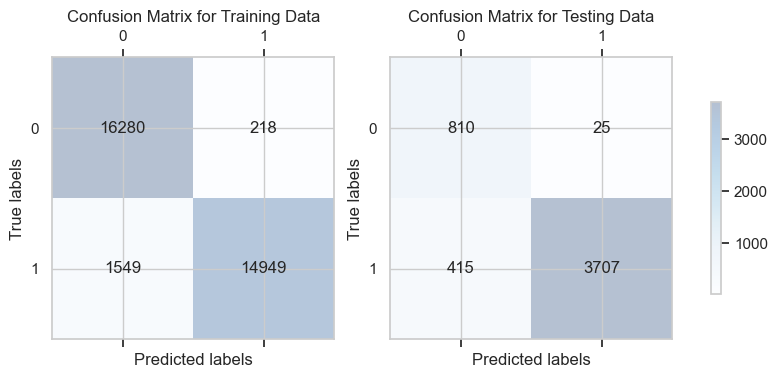

Training Data Metrics:

Accuracy: 0.9464480543096133
Precision: 0.9856266895233072
Recall: 0.9061098314947267
F1 Score: 0.944197063003316
ROC AUC Score: 0.9745011448211336

Testing Data Metrics:

Accuracy: 0.9112366350615292
Precision: 0.9933011789924974
Recall: 0.8993207180980107
F1 Score: 0.9439775910364145
ROC AUC Score: 0.966478106378219


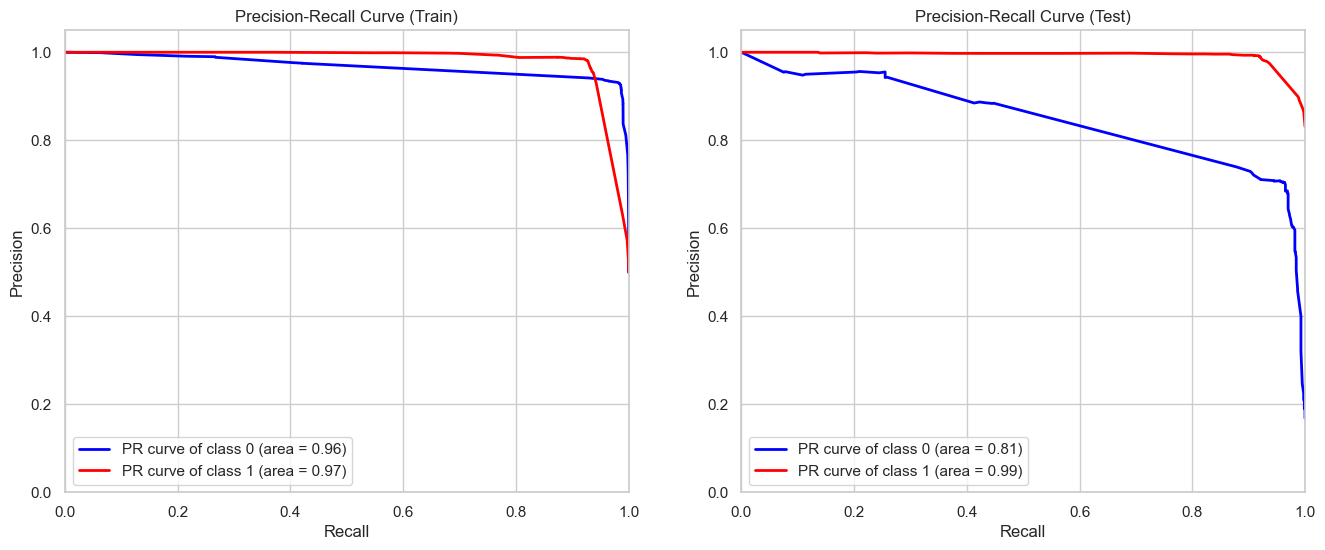

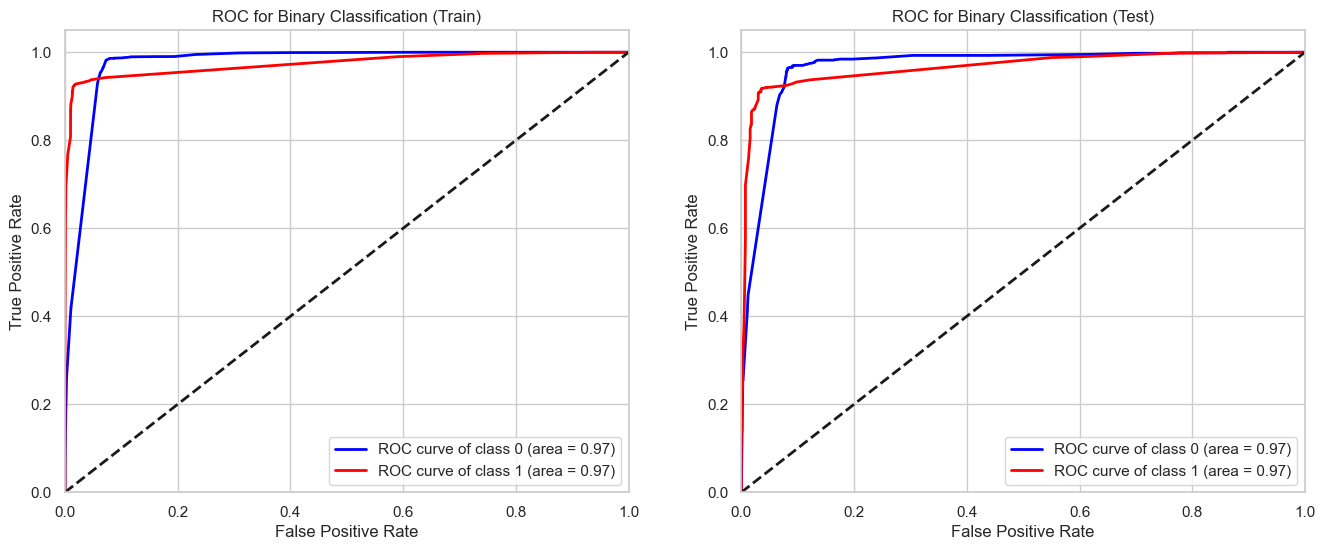

In [ ]:
# Initializing Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)


gbm, gbm_metrics_train, gbm_metrics_test = evaluate_model(gbm, X_train_resampled, y_train_resampled, X_test_final, y_test)

In [ ]:
# Combining metrics for each model
combined_lr = combine_train_test_metrics("LR", lr_metrics_train, lr_metrics_test)
combined_gbm = combine_train_test_metrics("GBM", gbm_metrics_train, gbm_metrics_test)
combined_dtree = combine_train_test_metrics("DT", dtree_metrics_train, dtree_metrics_test)

# Combining all into a single DataFrame
combined_metrics_all_models = pd.concat([combined_lr, combined_gbm, combined_dtree], axis=1)

combined_metrics_all_models.T


,Accuracy,F1 Score,Precision,ROC AUC Score,Recall
LR Train,0.927923,0.954968,0.994552,0.978712,0.918414
LR Test,0.919104,0.949221,0.992848,0.970077,0.909267
GBM Train,0.946448,0.944197,0.985627,0.974501,0.906110
GBM Test,0.911237,0.943978,0.993301,0.966478,0.899321
DT Train,0.978311,0.986813,0.998696,0.997991,0.975209
DT Test,0.916683,0.948943,0.967482,0.891105,0.931101


####  Recommendations
1. Logistic Regression (LR) appears to be the most balanced model with good performance on both training and testing sets. It also has high precision and recall. 

2. Gradient Boosting Machine (GBM) may need further tuning to address overfitting on the training set.

3. Decision Tree (DT) shows signs of overfitting and may not generalize well to new data.
> We can choose any model from logistic regression or gbm.


4. Lets choose GBM as our baseline model.

## Tuning the hyperparameters of GBM

In [ ]:
# Initialize the GBM model
gbm = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=  3, n_jobs=-1, verbose=2,)

# Fit the model
grid_search.fit(X_train_final, y_train,)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
GBM_tuned = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


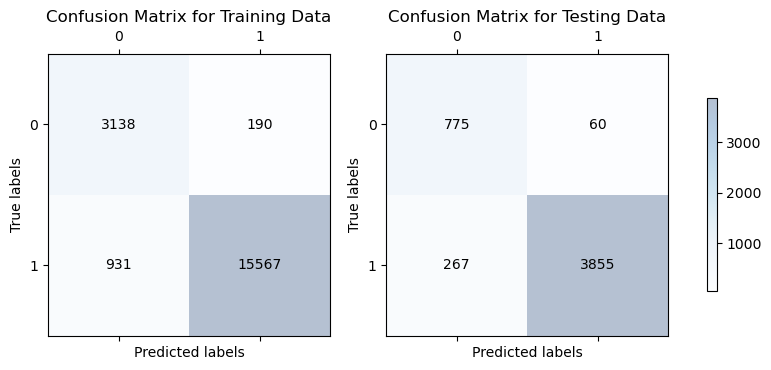

Training Data Metrics:

Accuracy: 0.9434580853424795
Precision: 0.9879418671066827
Recall: 0.9435689174445387
F1 Score: 0.9652456983413423
ROC AUC Score: 0.9804976542902637

Testing Data Metrics:

Accuracy: 0.934032681057091
Precision: 0.9846743295019157
Recall: 0.9352256186317321
F1 Score: 0.9593131765584173
ROC AUC Score: 0.971648260974412


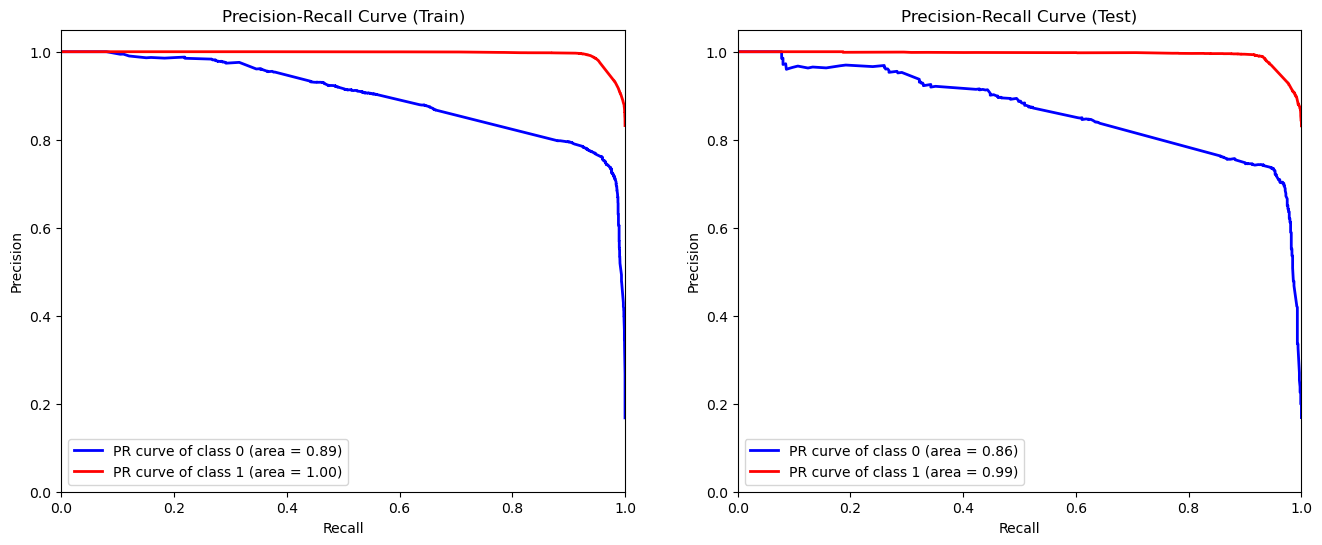

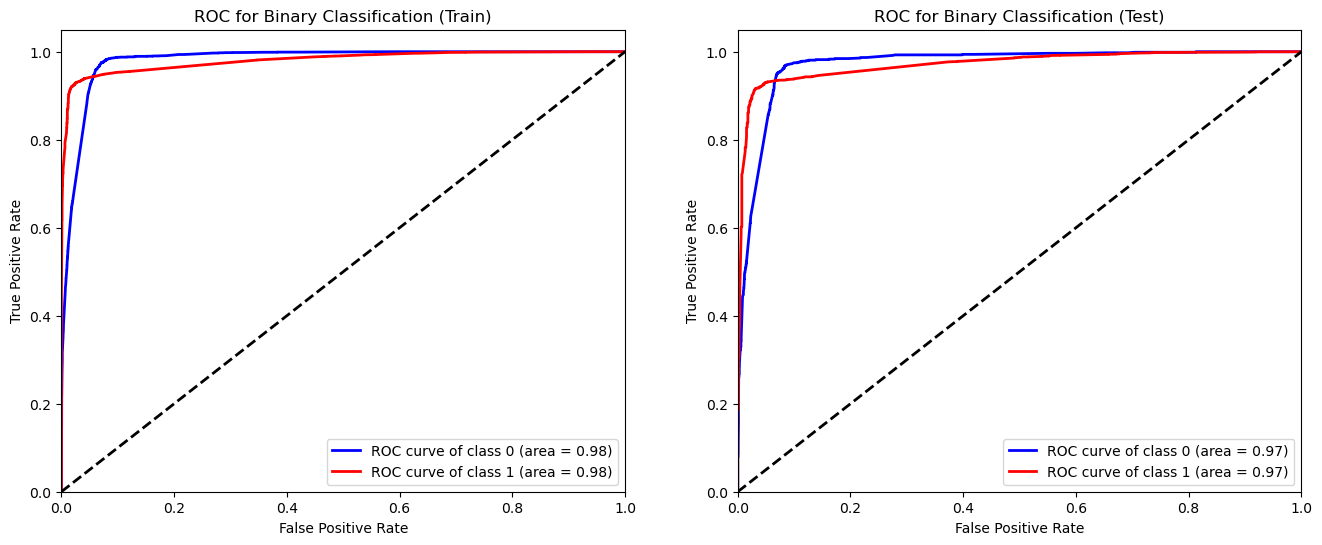

In [ ]:
GBM_tuned, GBM_tuned_metrics_train, GBM_tuned_metrics_test = evaluate_model(GBM_tuned, X_train_final, y_train, X_test_final, y_test)

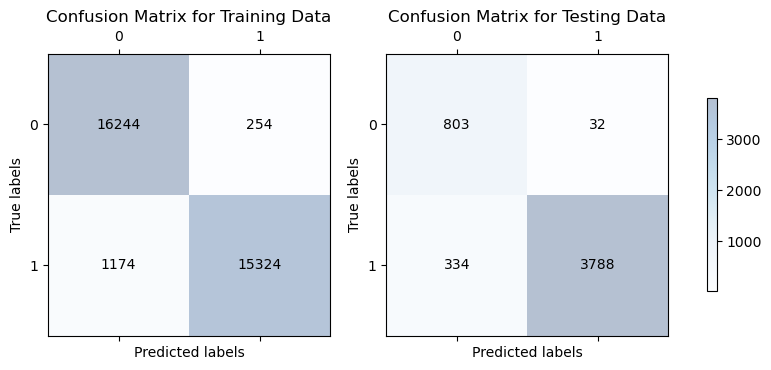

Training Data Metrics:

Accuracy: 0.956722026912353
Precision: 0.9836949544229041
Recall: 0.9288398593768942
F1 Score: 0.9554807332585111
ROC AUC Score: 0.9853923616319495

Testing Data Metrics:

Accuracy: 0.9261650191648174
Precision: 0.9916230366492147
Recall: 0.9189713731198448
F1 Score: 0.9539158902039789
ROC AUC Score: 0.9702655823723731


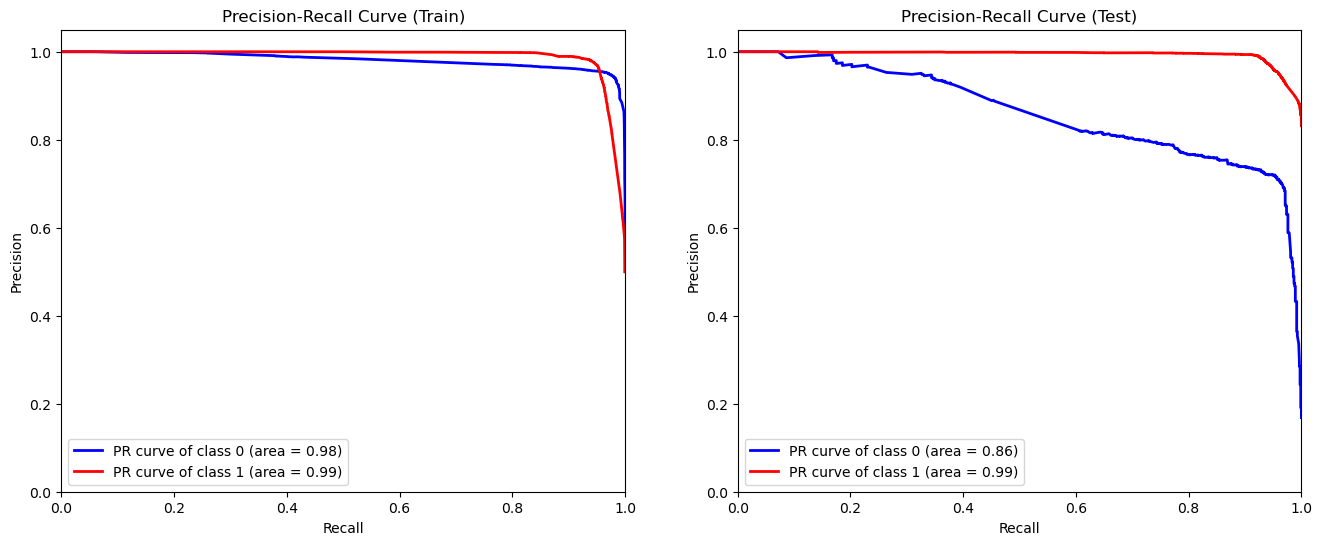

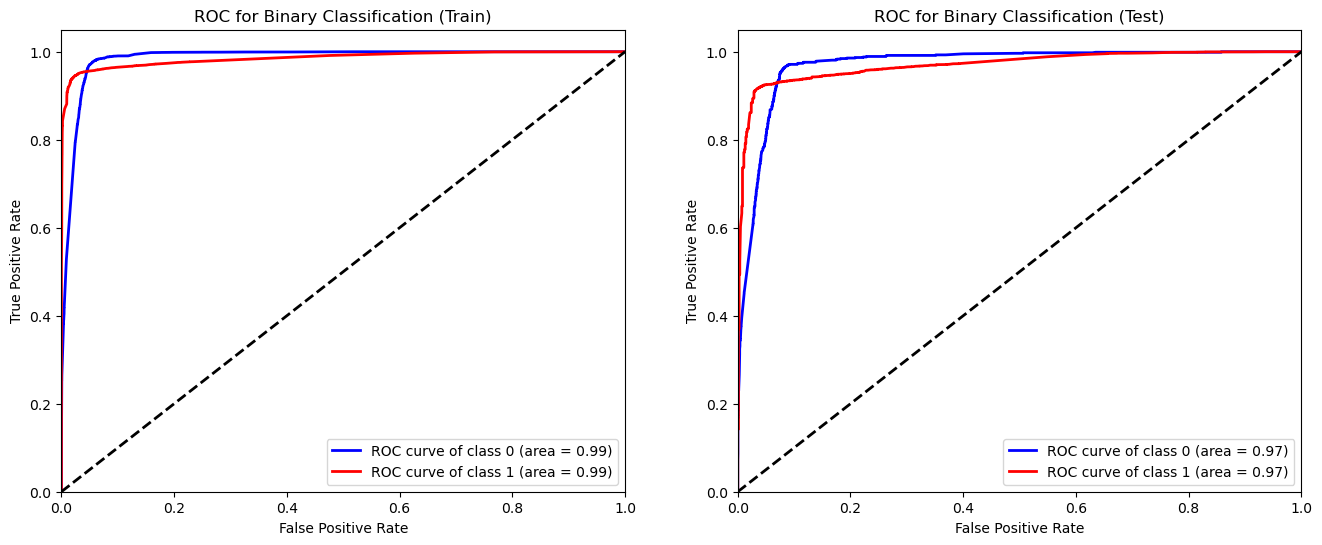

In [ ]:
GBM_tuned, GBM_tuned_metrics_train, GBM_tuned_metrics_test = evaluate_model(GBM_tuned, X_train_resampled, y_train_resampled, X_test_final, y_test)

## Storing all objects

In [ ]:
pickle.dump(GBM_tuned, open('GBM_tuned.pkl','wb'))
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))
pickle.dump(smote, open('smote.pkl','wb'))

## Model Interpretation

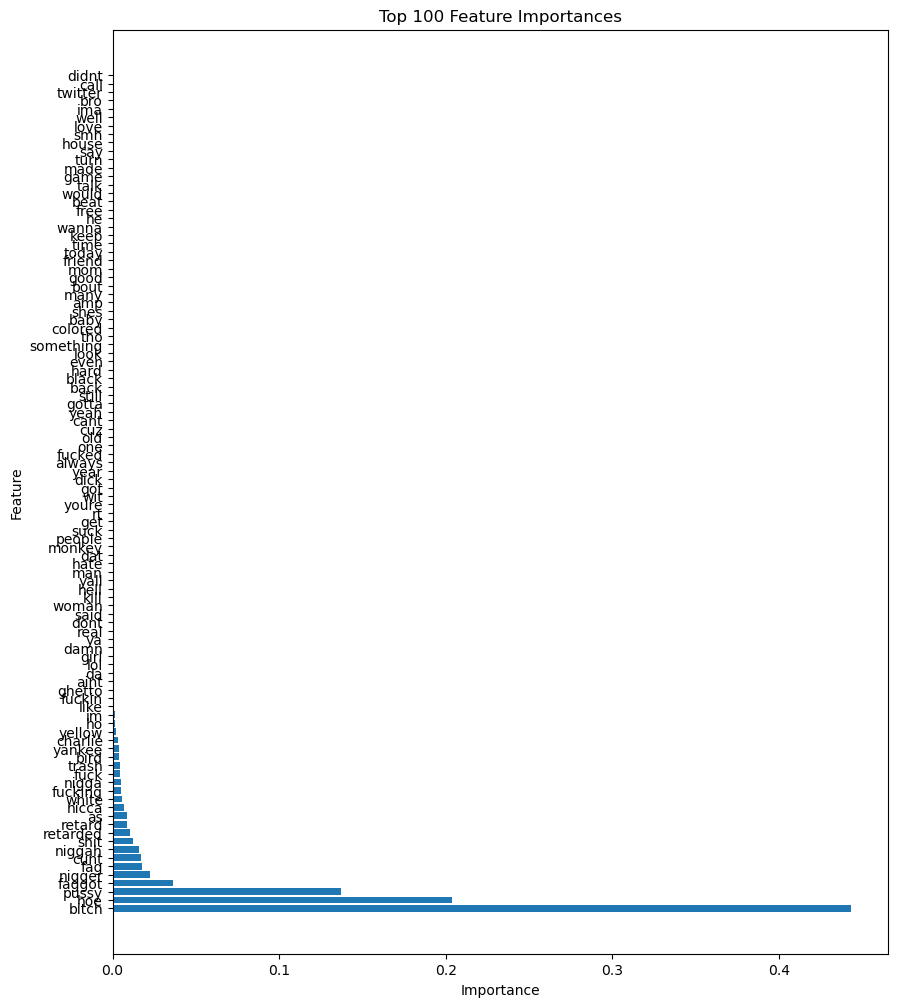

In [ ]:
# Chart representation
# Get feature importances
feature_importances = GBM_tuned.feature_importances_

# Get the corresponding feature names
feature_names = X_train_final.columns

# Sort the features by importance in descending order
indices = np.argsort(feature_importances)[::-1]

# Select the top 100 features
top_features = indices[:100]

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(range(len(top_features)), feature_importances[top_features], align="center")
plt.yticks(range(len(top_features)), feature_names[top_features])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 100 Feature Importances")
plt.show()

## Final Results

In [ ]:
# Combining metrics for each model
combined_lr = combine_train_test_metrics("LR", lr_metrics_train, lr_metrics_test)
combined_gbm = combine_train_test_metrics("GBM", gbm_metrics_train, gbm_metrics_test)
combined_dtree = combine_train_test_metrics("DT", dtree_metrics_train, dtree_metrics_test)
combined_tuned_gbm = combine_train_test_metrics("Tuned_GBM", GBM_tuned_metrics_train, GBM_tuned_metrics_test)

# Combining all into a single DataFrame
combined_metrics_all_models = pd.concat([combined_lr, combined_dtree,combined_gbm, combined_tuned_gbm], axis=1)

combined_metrics_all_models.T

,Accuracy,F1 Score,Precision,ROC AUC Score,Recall
LR Train,0.927923,0.954968,0.994552,0.978712,0.918414
LR Test,0.919104,0.949221,0.992848,0.970077,0.909267
DT Train,0.978311,0.986813,0.998696,0.997991,0.975209
DT Test,0.916683,0.948943,0.967482,0.891105,0.931101
GBM Train,0.947115,0.945013,0.984118,0.974545,0.908898
GBM Test,0.914868,0.946392,0.993333,0.966441,0.903688
Tuned_GBM Train,0.956722,0.955481,0.983695,0.985392,0.928840
Tuned_GBM Test,0.926165,0.953916,0.991623,0.970266,0.918971



#####  Recommendations
1. Tuned Gradient Boosting Machine (Tuned_GBM) appears to be the most balanced model with improved performance on both training and testing sets compared to the untuned GBM.

2. Logistic Regression (LR) remains a good option, especially if interpretability is important.

3. Decision Tree (DT) seems to overfit and may not generalize well to new data.

# Conclusion
*Therefore, the recommended model for adoption is Tuned Gradient Boosting Machine (Tuned_GBM).*